Import all necessary libraries

In [1]:
!pip install greek-stemmer-pos
!pip install --upgrade smart_open gensim nltk
!pip install --upgrade preprocessing
!pip install torch numpy
!pip install gensim
!pip install pandas
!pip install urllib3
!pip install -U Jinja2
!pip install numpy==1.23.0

  Obtaining dependency information for pytest-cov from https://files.pythonhosted.org/packages/a7/4b/8b78d126e275efa2379b1c2e09dc52cf70df16fc3b90613ef82531499d73/pytest_cov-4.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for coverage[toml]>=5.2.1 from https://files.pythonhosted.org/packages/49/d5/9d66fd984979b58927588efb0398953acbdb4c45eb7cfcd74fa9b8d51d12/coverage-7.4.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.0/234.0 kB 3.0 MB/s eta 0:00:00
  Obtaining dependency information for smart_open from https://files.pythonhosted.org/packages/fc/d9/d97f1db64b09278aba64e8c81b5d322d436132df5741c518f3823824fae0/smart_open-6.4.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: smart_open
    Found existing insta

Read dataset

In [2]:
import pandas as pd


file_path = "/kaggle/input/ys19-2023-assignment-3/train_set.csv"
valid_path = "/kaggle/input/ys19-2023-assignment-3/valid_set.csv"

# Read the CSV files
data = pd.read_csv(file_path)
valid = pd.read_csv(valid_path)

Same pre processing with the second assignment

In [3]:
import re
data['Text'] = data['Text'].apply(lambda x: x.lower())
valid['Text'] = valid['Text'].apply(lambda x: x.lower())
greek_stopwords = [
    'και', 'το', 'η', 'της', 'του', 'τα', 'σε', 'με', 'για', 'ειναι',
    'στο', 'απο', 'που', 'οι', 'την', 'ενα', 'μετα', 'εχει', 'δεν',
    'ειναι', 'μια', 'αυτο', 'εναν', 'αλλα', 'ο', 'μη', 'οτι', 'πως',
    'απο', 'στην', 'στον', 'τι', 'αυτη', 'των', 'αυτα', 'οταν', 'πολυ',
    'μας', 'ειναι', 'πριν', 'οτι', 'μονο', 'αυτος', 'τοτε', 'μεταξυ',
    'πολλα', 'οποτε', 'παρα', 'εαν', 'γυρω', 'αυτην', 'εκεινος', 'περισσοτερο',
    'προς', 'πολυ', 'τελικα', 'ολοι'
]
def remove_stopwords(text):
    words = text.split()  # Split the text into words
    words = [word for word in words if word.lower() not in greek_stopwords]
    return ' '.join(words)
valid['Text'] = valid['Text'].apply(remove_stopwords)
data['Text'] = data['Text'].apply(remove_stopwords)
url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
def remove_urls(text):
    return re.sub(url_pattern, '', text)
valid['Text'] = valid['Text'].apply(remove_urls)
data['Text'] = data['Text'].apply(remove_urls)
data['Text'] = data['Text'].apply(lambda x: re.sub('ό', 'ο', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('έ', 'ε', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('ί', 'ι', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('ή', 'η', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('ύ', 'υ', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('ώ', 'ω', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('ά', 'α', x))  
data['Text'] = data['Text'].apply(lambda x: re.sub('ς', 'σ', x))  

valid['Text'] = valid['Text'].apply(lambda x: re.sub('ό', 'ο', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('έ', 'ε', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('ί', 'ι', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('ή', 'η', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('ύ', 'υ', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('ώ', 'ω', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('ά', 'α', x))  
valid['Text'] = valid['Text'].apply(lambda x: re.sub('ς', 'σ', x))

from greek_stemmer import stemmer

# Define a function to perform stemming on the tweets
def stem_greek_text(text):
    words = text.split()
    stemmed_words = [stemmer.stem_word(word,"NNN") for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text


# Apply the stem_greek_text function to the 'tweets' column
data['Text'] = data['Text'].apply(stem_greek_text)
valid['Text'] = valid['Text'].apply(stem_greek_text)
data['Text'] = data['Text'].apply(lambda x: x.lower())
valid['Text'] = valid['Text'].apply(lambda x: x.lower())
data['Text'] = data['Text'].str.replace('ς', 'σ')
valid['Text'] = valid['Text'].str.replace('ς', 'σ')
data['Text'] = data['Text'].apply(lambda x: re.sub(r'[^A-Za-zΑ-Ωα-ω0-9 ]', lambda y: ' ' + y.group(0) + ' ', x))
valid['Text'] = valid['Text'].apply(lambda x: re.sub(r'[^A-Za-zΑ-Ωα-ω0-9 ]', lambda y: ' ' + y.group(0) + ' ', x))
data['Text'] = data['Text'].apply(lambda x: re.sub(r'\s+', ' ', x))
valid['Text'] = valid['Text'].apply(lambda x: re.sub(r'\s+', ' ', x))


print(data.head(10))
print(valid.head(10))

   New_ID                                               Text Sentiment   Party
0   35027   # απολυμανση _ κοριοι # απεντομωση _ κοριοσ #...   NEUTRAL  SYRIZA
1    9531  εξι νε επιστολ τ μακεδονι « καινε » τ νδ - μητ...  NEGATIVE      ND
2   14146     ισχυρ κκε , δυναμ λα στ βουλ στ καθημεριν αγων  POSITIVE     KKE
3   28716   @ five2nds @ anthi7vas μνημονιακοτατ # μερα25...   NEUTRAL     KKE
4   32886   @ ai _ katerina αυτ εινα συγκλονιστικ εινα ψυ...   NEUTRAL  SYRIZA
5   12112   @ tou _ diaolou εχ δικιο , αντι να παιζ εαμ ε...  NEGATIVE  SYRIZA
6   13115                             προκλητικ ολ τσιπρ σκα  POSITIVE  SYRIZA
7   21431   @ ksyrizohunter θ π " αλλιωσ " ; μητσοτακ δηλ...  POSITIVE      ND
8   12593  ραπισμ αντετοκουμπ υποκρισι μητσοτακη : εξι χρ...  POSITIVE      ND
9   19725   @ nikospappas16 @ atsipras @ kmitsotakis ξερ ...  POSITIVE      ND
   New_ID                                               Text Sentiment  \
0     435   @ glinard @ teza _ tereza @ adonisgeorgiadi @

Save to csv

In [4]:
data.to_csv("data.csv", index=False)
valid.to_csv("valid.csv", index=False)

From now on we can get access to clean data in this way:

In [5]:
import pandas as pd
valid = pd.read_csv("/kaggle/working/valid.csv")
data = pd.read_csv("/kaggle/working/data.csv")

Use label encoder to encode Sentiments


In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])
valid['Sentiment'] = label_encoder.fit_transform(valid['Sentiment'])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Define the word2vec model, different approaches will be tested afterwards



In [7]:
import nltk
from nltk.tokenize import word_tokenize
import gensim
from gensim.models import Word2Vec
input_dim = 100
nltk.download('punkt')
data['tokenized_text'] = data['Text'].apply(word_tokenize)
valid['tokenized_text'] = valid['Text'].apply(word_tokenize)
word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), vector_size=input_dim, window=5, min_count=1, workers=4)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Since the text of each tweet has not a fixed size we will use the mean embedding to represent each tweet, we will check some different approaches later


In [8]:
import numpy as np
data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
data.head()

,New_ID,Text,Sentiment,Party,tokenized_text,mean_embedding
0,35027,# απολυμανση _ κοριοι # απεντομωση _ κοριοσ #...,1,SYRIZA,"[#, απολυμανση, _, κοριοι, #, απεντομωση, _, κ...","[-0.1505616, 0.26924083, -0.112960175, 0.43009..."
1,9531,εξι νε επιστολ τ μακεδονι « καινε » τ νδ - μητ...,0,ND,"[εξι, νε, επιστολ, τ, μακεδονι, «, καινε, », τ...","[0.70712274, 0.34322986, -0.2040978, -0.533005..."
2,14146,"ισχυρ κκε , δυναμ λα στ βουλ στ καθημεριν αγων",2,KKE,"[ισχυρ, κκε, ,, δυναμ, λα, στ, βουλ, στ, καθημ...","[-0.5837337, 1.3391529, 0.08314032, -0.1577277..."
3,28716,@ five2nds @ anthi7vas μνημονιακοτατ # μερα25...,1,KKE,"[@, five2nds, @, anthi7vas, μνημονιακοτατ, #, ...","[-1.1203684, 0.86277145, -0.2595777, 0.7189221..."
4,32886,@ ai _ katerina αυτ εινα συγκλονιστικ εινα ψυ...,1,SYRIZA,"[@, ai, _, katerina, αυτ, εινα, συγκλονιστικ, ...","[-0.49940702, 0.33327243, -0.029890336, 0.5222..."


Same for validation set



In [9]:
valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
valid.head()

,New_ID,Text,Sentiment,Party,tokenized_text,mean_embedding
0,435,@ glinard @ teza _ tereza @ adonisgeorgiadi @...,2,SYRIZA,"[@, glinard, @, teza, _, tereza, @, adonisgeor...","[-0.20857988, 0.59832925, 0.10877698, 0.426659..."
1,3061,τσιπρασ : ζητησαμ απο αντιπολιτευσ να συμμετεχ...,0,SYRIZA,"[τσιπρασ, :, ζητησαμ, απο, αντιπολιτευσ, να, σ...","[-0.30971307, 0.5724602, 0.053040374, 0.171098..."
2,2161,"σωστ ελληνασ , δημοκρατησ , ελλην εξωτερικ ερχ...",0,ND,"[σωστ, ελληνασ, ,, δημοκρατησ, ,, ελλην, εξωτε...","[-0.590775, 0.46466023, -0.24135423, 0.5786664..."
3,1271,@ 30 _ _ kai ναι βλεπ αυτ ενδιαφερ τουσ μητσο...,2,ND,"[@, 30, _, _, kai, ναι, βλεπ, αυτ, ενδιαφερ, τ...","[-0.117760785, 0.23673494, 0.14577624, 0.35483..."
4,4396,συνεντευξ μητσοτακ alpha : υπο αιρεσ 13η συντα...,1,ND,"[συνεντευξ, μητσοτακ, alpha, :, υπο, αιρεσ, 13...","[0.56837666, 0.11533596, 0.3356076, 0.14703737..."


This is our train and validation sets, the way they are created remains unchanged



In [10]:
x_train = data['mean_embedding']
x_val = valid['mean_embedding']
y_val = valid['Sentiment']
y_train = data['Sentiment']

Convert to float type


In [11]:
x_train = np.vstack(x_train).astype(np.float32)
x_val = np.vstack(x_val).astype(np.float32)

# Now x_train_np is a NumPy array with float32 elements
print(x_train.dtype)
y_val = y_val.values
y_train = y_train.values
print(y_train)

float32
[1 0 2 ... 1 0 1]


This is our DataLoader that uses x_train and y_train that will be defined later, the definition of this class remains the same




In [12]:
import torch
from torch.utils.data import Dataset, DataLoader
#Creating data loaders
class TrainData(Dataset):
    def __init__(self,x,y,input_dim):
        self.x = torch.from_numpy(x_train)
        self.y = torch.from_numpy(y_train)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
    
class ValData(Dataset):
    def __init__(self,x,y,input_dim):
        self.x = x_val  # Assuming x_val is already a tensor
        self.y = y_val
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len

Create the dataset and data loader



In [13]:
train_dataset = TrainData(x_train,y_train,input_dim)
val_dataset = ValData(x_val,y_val,input_dim)

train_loader = DataLoader(dataset=train_dataset, batch_size=64)
val_loader = DataLoader(dataset=val_dataset, batch_size=64)

Get an insight of the data, since we are using mean embedding, the values are close to 0



In [14]:
val_dataset.x[1:10]


array([[-3.09713066e-01,  5.72460175e-01,  5.30403741e-02,
         1.71098500e-01, -3.98322381e-02, -4.46594656e-01,
        -7.04144686e-02,  6.52854145e-01, -8.80533159e-01,
        -2.42156565e-01, -4.61073697e-01, -3.79082054e-01,
        -1.04942754e-01,  3.49316806e-01,  4.10609275e-01,
        -2.95812637e-01, -5.74207446e-03, -1.11561529e-01,
        -9.95066613e-02, -1.55011487e+00,  2.51224637e-01,
         8.16463649e-01,  7.42476344e-01,  4.73323911e-02,
         6.92978203e-02, -4.34753448e-01, -2.38857076e-01,
         2.09553942e-01, -6.42826617e-01,  2.34670848e-01,
         4.92456734e-01, -2.19028205e-01,  4.35883135e-01,
        -8.88973176e-01, -9.44643989e-02,  6.25973225e-01,
        -3.66837867e-02, -1.12655222e-01,  1.51058316e-01,
        -1.14262545e+00,  1.19122639e-01, -4.72900152e-01,
        -5.98942280e-01,  6.40534401e-01,  8.25229049e-01,
        -1.17555596e-01, -3.02863479e-01,  2.69376814e-01,
         6.80531025e-01,  2.65508294e-01, -1.61142498e-0

Get an insight of the labels



In [15]:
train_dataset.y[1:10]


tensor([0, 2, 1, 1, 0, 2, 2, 2, 2])

Check that size of x and y are the same



In [16]:
train_dataset.x.shape, train_dataset.y.shape


(torch.Size([36630, 100]), torch.Size([36630]))

A simple Sentiment classifier to check if it works 

In [17]:
import torch
from torch import nn

# Define the model
class SentimentClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim, num_layers):
        super(SentimentClassifier, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, 
                            bidirectional=True, dropout=0.5)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 for bidirectional

    def forward(self, x):
        # Add a sequence dimension if not present
        if x.dim() == 2:
            x = x.unsqueeze(1)  # Reshape from [batch_size, features] to [batch_size, 1, features]

        lstm_out, _ = self.lstm(x)
        final_output = lstm_out[:, -1, :]
        return self.fc(final_output)

# Hyperparameters
embedding_dim = 100  # Assuming x_train is [batch, seq_len, embedding_dim]
hidden_dim = 256
output_dim = 3  # 3 sentiments
num_layers = 2  # Number of stacked LSTMs

# Model instantiation
model = SentimentClassifier(embedding_dim, hidden_dim, output_dim, num_layers)


Use adam optimizer and cross entropy loss

In [18]:
#Will remain same for the rest of the project
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Simple test

In [19]:
num_epochs = 10  # Number of epochs
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        x_batch, y_batch = batch
        x_batch, y_batch = batch
        x_batch = x_batch.float()  # Ensure the input is float
        y_batch = y_batch.long()   # Ensure the target is long/int
        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for batch in val_loader:  # DataLoader for validation data
            x_val, y_val = batch
            outputs = model(x_val)
            _, predicted = torch.max(outputs.data, 1)
            total += y_val.size(0)
            correct += (predicted == y_val).sum().item()

    print(f'Epoch {epoch+1}, Loss: {loss.item()}, Accuracy: {100 * correct / total}%')

Epoch 1, Loss: 1.072221279144287, Accuracy: 36.792813455657495%
Epoch 2, Loss: 1.0536227226257324, Accuracy: 37.72935779816514%
Epoch 3, Loss: 1.0518077611923218, Accuracy: 38.34097859327217%
Epoch 4, Loss: 1.020171046257019, Accuracy: 38.57033639143731%
Epoch 5, Loss: 1.0190273523330688, Accuracy: 38.45565749235474%
Epoch 6, Loss: 1.021687388420105, Accuracy: 38.87614678899082%
Epoch 7, Loss: 1.0343010425567627, Accuracy: 38.665902140672785%
Epoch 8, Loss: 1.0194505453109741, Accuracy: 38.68501529051988%
Epoch 9, Loss: 1.0150824785232544, Accuracy: 38.79969418960245%
Epoch 10, Loss: 1.0013877153396606, Accuracy: 39.00993883792049%


we will use gpu for faster training

In [20]:
torch.cuda.get_device_name(0)

'Tesla T4'

LSTM using timesteps

In [21]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
from sklearn.metrics import f1_score
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence,pad_sequence


num_cores = multiprocessing.cpu_count()
num_epochs = 11  # Number of epochs
criterion = nn.CrossEntropyLoss()
output_dim=3
class TextDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = [torch.tensor(e, dtype=torch.float) for e in embeddings]
        self.labels = torch.tensor(labels, dtype=torch.long)
        self.lengths = torch.tensor([len(e) for e in embeddings], dtype=torch.long)


    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx], self.lengths[idx]


class SentimentClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections):
        super(SentimentClassifier, self).__init__()
        self.rnn = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, bidirectional=True, dropout=dropout_rate, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # Adjust for bidirectional
        self.use_skip_connections = use_skip_connections

    def forward(self, x, lengths):
        # Ensure lengths are on the same device as x
        lengths = lengths.to(x.device)

        # Pack the sequence
        x_packed = pack_padded_sequence(x, lengths.cpu(), batch_first=True, enforce_sorted=False)
        
        # LSTM
        packed_output, (hidden, cell) = self.rnn(x_packed)
        
        # Optionally, if you want to use the output directly
        # output, _ = pad_packed_sequence(packed_output, batch_first=True)
        
        # Use the hidden state of the last layer of LSTM for both directions
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        
        # Forward pass through the fully connected layer
        out = self.fc(hidden)
        
        return out

def prepare_sequence(texts, model, sequence_length):
    embeddings = np.zeros((len(texts), sequence_length, model.vector_size))
    for i, tokens in enumerate(texts):
        for j, token in enumerate(tokens[:sequence_length]):
            if token in model.wv:
                embeddings[i, j, :] = model.wv[token]
    return embeddings
def get_embeddings(tokens, model):
    # Use model.vector_size to dynamically get the embedding size
    embeddings = np.zeros((len(tokens), model.vector_size))
    for i, token in enumerate(tokens):
        if token in model.wv:
            embeddings[i] = model.wv[token]
    return embeddings

def collate_batch(batch):
    sequences, labels, lengths = zip(*batch)
    sequences_padded = pad_sequence(sequences, batch_first=True)
    labels = torch.tensor(labels)
    lengths = torch.tensor(lengths)
    return sequences_padded, labels, lengths

def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 200)
    num_layers = trial.suggest_int('num_layers', 1, 4)
    window_size = trial.suggest_int('window_size', 3, 10)
    sequence_length = trial.suggest_int('sequence_length', 5, 50)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    if num_layers != 1 :    
        dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    else :
        dropout_rate = 0
    b_size = trial.suggest_int('b_size', 32, 128)
    use_skip_connections = trial.suggest_categorical('use_skip_connections', [True, False])
    gradient_clip_val = trial.suggest_float('gradient_clip_val', 0.1, 1.0)
    
    
    
    data['tokenized_padded'] = data['Text'].apply(lambda x: word_tokenize(x.lower())[:sequence_length])
    valid['tokenized_padded'] = valid['Text'].apply(lambda x: word_tokenize(x.lower())[:sequence_length])
    
    word2vec_model = Word2Vec(sentences=data['tokenized_padded'].tolist(), 
                              vector_size=input_dim, 
                              window=window_size, 
                              min_count=1, 
                              workers=num_cores)
    data['embeddings'] = data['tokenized_padded'].apply(lambda x: get_embeddings(x, word2vec_model))
    valid['embeddings'] = valid['tokenized_padded'].apply(lambda x: get_embeddings(x, word2vec_model))
    
    train_dataset = TextDataset(data['embeddings'], data['Sentiment'])
    valid_dataset = TextDataset(valid['embeddings'], valid['Sentiment'])
    
    
    
    train_loader = DataLoader(train_dataset, batch_size=b_size, shuffle=True, collate_fn=collate_batch)
    valid_loader = DataLoader(valid_dataset, batch_size=b_size, collate_fn=collate_batch)
    
    model = SentimentClassifier( input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch, lengths in train_loader:
            x_batch = x_batch.to(device).float()  # Ensure x_batch is float
            y_batch = y_batch.to(device)
            lengths = lengths.to(device)

            optimizer.zero_grad()
            outputs = model(x_batch, lengths)
            loss = criterion(outputs, y_batch)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_val)
            optimizer.step()
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for x_val, y_val, lengths in valid_loader:  # Unpack lengths here
            x_val, y_val = x_val.to(device), y_val.to(device)
            lengths = lengths.to(device)  # Ensure lengths are on the correct device

            # No need to call forward explicitly, just use model(x_val, lengths)
            outputs = model(x_val, lengths)  
            _, predicted = torch.max(outputs.data, 1)

            all_labels.extend(y_val.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    return f1

study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)


[I 2024-02-02 09:37:38,445] A new study created in memory with name: no-name-d1bd75b5-a587-4812-8332-0ec778939858
[I 2024-02-02 09:38:39,475] Trial 0 finished with value: 0.3725304743224434 and parameters: {'input_dim': 106, 'hidden_dim': 191, 'num_layers': 3, 'window_size': 7, 'sequence_length': 12, 'learning_rate': 2.9375384576328295e-05, 'dropout_rate': 0.12323344486727979, 'b_size': 116, 'use_skip_connections': False, 'gradient_clip_val': 0.1185260448662222}. Best is trial 0 with value: 0.3725304743224434.
[I 2024-02-02 09:39:32,208] Trial 1 finished with value: 0.3569827821103695 and parameters: {'input_dim': 196, 'hidden_dim': 168, 'num_layers': 1, 'window_size': 4, 'sequence_length': 13, 'learning_rate': 8.17949947521167e-05, 'b_size': 82, 'use_skip_connections': True, 'gradient_clip_val': 0.6506676052501416}. Best is trial 0 with value: 0.3725304743224434.
[I 2024-02-02 09:40:55,862] Trial 2 finished with value: 0.38489286676568596 and parameters: {'input_dim': 71, 'hidden_dim'

Best Hyperparameters: {'input_dim': 73, 'hidden_dim': 163, 'num_layers': 3, 'window_size': 6, 'sequence_length': 40, 'learning_rate': 0.0022095185940842464, 'dropout_rate': 0.3527369391379575, 'b_size': 124, 'use_skip_connections': False, 'gradient_clip_val': 0.41753062553081}
Best Accuracy: 0.39301855624703824


The results are not that good lets try mean embedding isntead

In [22]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
from sklearn.metrics import f1_score

num_cores = multiprocessing.cpu_count()
num_epochs = 11  # Number of epochs
criterion = nn.CrossEntropyLoss()
output_dim=3
class TrainData(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
    
class ValData(Dataset):
    def __init__(self,x,y,input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
# Define the model
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections):
        super(SentimentClassifier, self).__init__()
        self.use_skip_connections = use_skip_connections #Bool type whether to skip connections or not
        self.rnn = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, bidirectional=True, dropout=dropout_rate)    #The type of the cells
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 for bidirectional

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)  #match the expected input shape for the LSTM which is [batch_size, sequence_length, features]
        
        rnn_out, _ = self.rnn(x)
        if self.use_skip_connections and x.size(2) == rnn_out.size(2):
            rnn_out = rnn_out + x  # add the input x directly to rnn_out, creating a skip connection
        final_output = rnn_out[:, -1, :] #This line selects the output of the last time step from rnn_out
        return self.fc(final_output) #The final step of the forward pass is to feed the last time step's output into the fully connected layer (self.fc), which then outputs the final sentiment classification.

    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 200)
    num_layers = trial.suggest_int('num_layers', 1, 4)
    window_size = trial.suggest_int('window_size', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    if num_layers != 1 :    
        dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    else :
        dropout_rate = 0
    b_size = trial.suggest_int('b_size', 32, 128)
    use_skip_connections = trial.suggest_categorical('use_skip_connections', [True, False])
    gradient_clip_val = trial.suggest_float('gradient_clip_val', 0.1, 1.0)
    model = SentimentClassifier( input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), 
                              vector_size=input_dim, 
                              window=window_size, 
                              min_count=1, 
                              workers=num_cores)

    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    y_val = y_val.values
    y_train = y_train.values
    
    
    train_dataset = TrainData(x_train, y_train,input_dim)
    val_dataset = ValData(x_val,y_val,input_dim)
    
    train_loader = DataLoader(dataset=train_dataset, batch_size=b_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=b_size, shuffle=True)
    for epoch in range(num_epochs):
        model.train()
        for batch in train_loader:
            x_batch, y_batch = batch
            x_batch = x_batch.float()  # Ensure the input is float
            y_batch = y_batch.long()   # Ensure the target is long/int
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            optimizer.zero_grad()
            outputs = model.forward(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_val)
            optimizer.step()
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for batch in val_loader:  # DataLoader for validation data
            x_val, y_val = batch
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            outputs = model.forward(x_val)
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(y_val.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    return f1

study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)


[I 2024-02-02 10:53:27,346] A new study created in memory with name: no-name-208b38f0-9848-49e6-afa7-b539d981a38f
[I 2024-02-02 10:54:54,320] Trial 0 finished with value: 0.3510830527145457 and parameters: {'input_dim': 106, 'hidden_dim': 191, 'num_layers': 3, 'window_size': 7, 'learning_rate': 2.9380279387035334e-05, 'dropout_rate': 0.16239780813448107, 'b_size': 37, 'use_skip_connections': True, 'gradient_clip_val': 0.737265320016441}. Best is trial 0 with value: 0.3510830527145457.
[I 2024-02-02 10:56:40,786] Trial 1 finished with value: 0.3463869961819629 and parameters: {'input_dim': 53, 'hidden_dim': 195, 'num_layers': 4, 'window_size': 4, 'learning_rate': 3.511356313970405e-05, 'dropout_rate': 0.17336180394137352, 'b_size': 61, 'use_skip_connections': True, 'gradient_clip_val': 0.36210622617823773}. Best is trial 0 with value: 0.3510830527145457.
[I 2024-02-02 10:57:19,764] Trial 2 finished with value: 0.3709104287724193 and parameters: {'input_dim': 142, 'hidden_dim': 36, 'num_

Best Hyperparameters: {'input_dim': 66, 'hidden_dim': 49, 'num_layers': 1, 'window_size': 5, 'learning_rate': 0.0031816883659386047, 'b_size': 75, 'use_skip_connections': True, 'gradient_clip_val': 0.717270733563707}
Best Accuracy: 0.3972380746373314


In [23]:
optuna.visualization.plot_optimization_history(study)

In [24]:
optuna.visualization.plot_parallel_coordinate(study)

In [25]:
optuna.visualization.plot_slice(study)

In [26]:
optuna.visualization.plot_param_importances(study)

So the results are better, more consistent and faster using mean embedding and as answered in piazza post, it is acceptable, so we are going to use mean embedding

GRU with mean embedding

In [27]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from sklearn.metrics import f1_score
from torch.nn import functional as F
num_cores = multiprocessing.cpu_count()
num_epochs = 11  # Number of epochs
criterion = nn.CrossEntropyLoss()
output_dim=3

class TrainData(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
    
class ValData(Dataset):
    def __init__(self,x,y,input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
# Define the model
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections):
        super(SentimentClassifier, self).__init__()
        self.use_skip_connections = use_skip_connections
        self.rnn = nn.GRU(input_dim, hidden_dim, num_layers=num_layers, bidirectional=True, dropout=dropout_rate)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 for bidirectional

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)
        
        rnn_out, _ = self.rnn(x)
        if self.use_skip_connections and x.size(2) == rnn_out.size(2):
            rnn_out = rnn_out + x  # Skip connection
        final_output = rnn_out[:, -1, :]
        return self.fc(final_output)

    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 200)
    num_layers = trial.suggest_int('num_layers', 1, 4)
    window_size = trial.suggest_int('window_size', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    if num_layers != 1 :    
        dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    else :
        dropout_rate = 0
    b_size = trial.suggest_int('b_size', 32, 128)
    use_skip_connections = trial.suggest_categorical('use_skip_connections', [True, False])
    gradient_clip_val = trial.suggest_float('gradient_clip_val', 0.1, 1.0)
    model = SentimentClassifier(input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), 
                              vector_size=input_dim, 
                              window=window_size, 
                              min_count=1, 
                              workers=num_cores)

    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    y_val = y_val.values
    y_train = y_train.values
    
    
    train_dataset = TrainData(x_train, y_train,input_dim)
    val_dataset = ValData(x_val,y_val,input_dim)
    
    train_loader = DataLoader(dataset=train_dataset, batch_size=b_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=b_size, shuffle=True)
    for epoch in range(num_epochs):
        model.train()
        for batch in train_loader:
            x_batch, y_batch = batch
            x_batch = x_batch.float()  # Ensure the input is float
            y_batch = y_batch.long()   # Ensure the target is long/int
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            optimizer.zero_grad()
            outputs = model.forward(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_val)
            optimizer.step()
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for batch in val_loader:  # DataLoader for validation data
            x_val, y_val = batch
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            outputs = model.forward(x_val)
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(y_val.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    return f1

study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2024-02-02 11:22:44,516] A new study created in memory with name: no-name-1e0b15dd-f191-44b4-a3bb-ef5e0b82f398
[I 2024-02-02 11:24:11,743] Trial 0 finished with value: 0.3730241654081378 and parameters: {'input_dim': 106, 'hidden_dim': 191, 'num_layers': 3, 'window_size': 7, 'learning_rate': 2.9380279387035334e-05, 'dropout_rate': 0.16239780813448107, 'b_size': 37, 'use_skip_connections': True, 'gradient_clip_val': 0.737265320016441}. Best is trial 0 with value: 0.3730241654081378.
[I 2024-02-02 11:26:07,826] Trial 1 finished with value: 0.36146353402384457 and parameters: {'input_dim': 53, 'hidden_dim': 195, 'num_layers': 4, 'window_size': 4, 'learning_rate': 3.511356313970405e-05, 'dropout_rate': 0.17336180394137352, 'b_size': 61, 'use_skip_connections': True, 'gradient_clip_val': 0.36210622617823773}. Best is trial 0 with value: 0.3730241654081378.
[I 2024-02-02 11:26:50,594] Trial 2 finished with value: 0.37597581627948107 and parameters: {'input_dim': 142, 'hidden_dim': 36, 'nu

Best Hyperparameters: {'input_dim': 132, 'hidden_dim': 149, 'num_layers': 1, 'window_size': 7, 'learning_rate': 0.000254051012882975, 'b_size': 74, 'use_skip_connections': True, 'gradient_clip_val': 0.19253843533912526}
Best Accuracy: 0.39740204177098876


In [28]:
optuna.visualization.plot_optimization_history(study)

In [29]:
optuna.visualization.plot_parallel_coordinate(study)

In [30]:
optuna.visualization.plot_slice(study)

In [31]:
optuna.visualization.plot_param_importances(study)

Simple RNN for display purposes only

In [32]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
from sklearn.metrics import f1_score
num_cores = multiprocessing.cpu_count()
num_epochs = 11  # Number of epochs
criterion = nn.CrossEntropyLoss()
output_dim=3
class TrainData(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
    
class ValData(Dataset):
    def __init__(self,x,y,input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
# Define the model
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections):
        super(SentimentClassifier, self).__init__()
        self.use_skip_connections = use_skip_connections
        self.rnn = nn.RNN(input_dim, hidden_dim, num_layers=num_layers, bidirectional=True, nonlinearity='tanh')
        self.dropout = nn.Dropout(dropout_rate)  # Manual dropout layer
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 for bidirectional

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)
        
        rnn_out, _ = self.rnn(x)
        if self.use_skip_connections and x.size(2) == rnn_out.size(2):
            rnn_out = rnn_out + x  # Skip connection

        # Apply dropout to the final output of RNN
        rnn_out = self.dropout(rnn_out)
        final_output = rnn_out[:, -1, :]
        return self.fc(final_output)

    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 200)
    num_layers = trial.suggest_int('num_layers', 1, 4)
    window_size = trial.suggest_int('window_size', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    if num_layers != 1 :    
        dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    else :
        dropout_rate = 0
    b_size = trial.suggest_int('b_size', 32, 128)
    use_skip_connections = trial.suggest_categorical('use_skip_connections', [True, False])
    gradient_clip_val = trial.suggest_float('gradient_clip_val', 0.1, 1.0)
    model = SentimentClassifier( input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), 
                              vector_size=input_dim, 
                              window=window_size, 
                              min_count=1, 
                              workers=num_cores)

    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    y_val = y_val.values
    y_train = y_train.values
    
    
    train_dataset = TrainData(x_train, y_train,input_dim)
    val_dataset = ValData(x_val,y_val,input_dim)
    
    train_loader = DataLoader(dataset=train_dataset, batch_size=b_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=b_size, shuffle=True)
    for epoch in range(num_epochs):
        model.train()
        for batch in train_loader:
            x_batch, y_batch = batch
            x_batch = x_batch.float()  # Ensure the input is float
            y_batch = y_batch.long()   # Ensure the target is long/int
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            optimizer.zero_grad()
            outputs = model.forward(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_val)
            optimizer.step()
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for batch in val_loader:  # DataLoader for validation data
            x_val, y_val = batch
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            outputs = model.forward(x_val)
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(y_val.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    return f1

study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2024-02-02 11:57:35,950] A new study created in memory with name: no-name-a95498bd-b8d9-4fab-be3a-26ff0f562aaf
[I 2024-02-02 11:58:29,786] Trial 0 finished with value: 0.38506762575163483 and parameters: {'input_dim': 106, 'hidden_dim': 191, 'num_layers': 3, 'window_size': 7, 'learning_rate': 2.9380279387035334e-05, 'dropout_rate': 0.16239780813448107, 'b_size': 37, 'use_skip_connections': True, 'gradient_clip_val': 0.737265320016441}. Best is trial 0 with value: 0.38506762575163483.
[I 2024-02-02 11:59:12,435] Trial 1 finished with value: 0.37519195467371896 and parameters: {'input_dim': 53, 'hidden_dim': 195, 'num_layers': 4, 'window_size': 4, 'learning_rate': 3.511356313970405e-05, 'dropout_rate': 0.17336180394137352, 'b_size': 61, 'use_skip_connections': True, 'gradient_clip_val': 0.36210622617823773}. Best is trial 0 with value: 0.38506762575163483.
[I 2024-02-02 11:59:51,661] Trial 2 finished with value: 0.3415041356734809 and parameters: {'input_dim': 142, 'hidden_dim': 36, '

Best Hyperparameters: {'input_dim': 73, 'hidden_dim': 22, 'num_layers': 1, 'window_size': 4, 'learning_rate': 0.0004495237700229239, 'b_size': 105, 'use_skip_connections': True, 'gradient_clip_val': 0.503566695085681}
Best Accuracy: 0.3957554874921091


In [33]:
optuna.visualization.plot_optimization_history(study)

In [34]:
optuna.visualization.plot_parallel_coordinate(study)

In [35]:
optuna.visualization.plot_slice(study)

In [36]:
optuna.visualization.plot_param_importances(study)

For LSTM and GRU we will also try to use tfidf instead of mean value to create the representative embedding of each text

In [37]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from torch.nn import functional as F
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

num_cores = multiprocessing.cpu_count()
num_epochs = 11  # Number of epochs
criterion = nn.CrossEntropyLoss()
output_dim=3
class TrainData(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
    
class ValData(Dataset):
    def __init__(self,x,y,input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
# Define the model
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections):
        super(SentimentClassifier, self).__init__()
        self.use_skip_connections = use_skip_connections
        self.rnn = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, bidirectional=True, dropout=dropout_rate)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 for bidirectional

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)
        
        rnn_out, _ = self.rnn(x)
        if self.use_skip_connections and x.size(2) == rnn_out.size(2):
            rnn_out = rnn_out + x  # Skip connection
        final_output = rnn_out[:, -1, :]
        return self.fc(final_output)

def tfidf_weighted_embedding(tokens, model, tfidf):
    word_ids = [model.wv.key_to_index[word] for word in tokens if word in model.wv]
    word_tfidf = tfidf.transform([' '.join(tokens)]).toarray()[0, word_ids]
    word_vectors = np.array([model.wv[word] for word in tokens if word in model.wv])
    return np.dot(word_tfidf, word_vectors) / np.sum(word_tfidf)

def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 200)
    num_layers = trial.suggest_int('num_layers', 1, 4)
    window_size = trial.suggest_int('window_size', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    if num_layers != 1 :    
        dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    else :
        dropout_rate = 0
    b_size = trial.suggest_int('b_size', 32, 128)
    use_skip_connections = trial.suggest_categorical('use_skip_connections', [True, False])
    gradient_clip_val = trial.suggest_float('gradient_clip_val', 0.1, 1.0)
    model = SentimentClassifier(input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), 
                              vector_size=input_dim, 
                              window=window_size, 
                              min_count=1, 
                              workers=num_cores)
    tfidf = TfidfVectorizer(vocabulary=word2vec_model.wv.key_to_index)
    tfidf.fit(data['tokenized_text'].apply(lambda x: ' '.join(x)))
    data['tfidf_embedding'] = data['tokenized_text'].apply(lambda tokens: tfidf_weighted_embedding(tokens, word2vec_model, tfidf))
    valid['tfidf_embedding'] = valid['tokenized_text'].apply(lambda tokens: tfidf_weighted_embedding(tokens, word2vec_model, tfidf))
    
    x_train = data['tfidf_embedding']
    x_val = valid['tfidf_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    y_val = y_val.values
    y_train = y_train.values
    
    
    train_dataset = TrainData(x_train, y_train,input_dim)
    val_dataset = ValData(x_val,y_val,input_dim)
    
    train_loader = DataLoader(dataset=train_dataset, batch_size=b_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=b_size, shuffle=True)
    for epoch in range(num_epochs):
        model.train()
        for batch in train_loader:
            x_batch, y_batch = batch
            x_batch = x_batch.float()  # Ensure the input is float
            y_batch = y_batch.long()   # Ensure the target is long/int
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            optimizer.zero_grad()
            outputs = model.forward(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_val)
            optimizer.step()
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for batch in val_loader:  # DataLoader for validation data
            x_val, y_val = batch
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            outputs = model.forward(x_val)
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(y_val.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    return f1

study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)


[I 2024-02-02 12:24:12,955] A new study created in memory with name: no-name-c154ab07-8914-412e-8738-7926c9eaf2e3
[I 2024-02-02 12:26:35,566] Trial 0 finished with value: 0.3621111121159168 and parameters: {'input_dim': 106, 'hidden_dim': 191, 'num_layers': 3, 'window_size': 7, 'learning_rate': 2.9380279387035334e-05, 'dropout_rate': 0.16239780813448107, 'b_size': 37, 'use_skip_connections': True, 'gradient_clip_val': 0.737265320016441}. Best is trial 0 with value: 0.3621111121159168.
[I 2024-02-02 12:29:18,793] Trial 1 finished with value: 0.36615559044756735 and parameters: {'input_dim': 53, 'hidden_dim': 195, 'num_layers': 4, 'window_size': 4, 'learning_rate': 3.511356313970405e-05, 'dropout_rate': 0.17336180394137352, 'b_size': 61, 'use_skip_connections': True, 'gradient_clip_val': 0.36210622617823773}. Best is trial 1 with value: 0.36615559044756735.
[I 2024-02-02 12:30:58,844] Trial 2 finished with value: 0.36073818601032 and parameters: {'input_dim': 142, 'hidden_dim': 36, 'num_

Best Hyperparameters: {'input_dim': 169, 'hidden_dim': 141, 'num_layers': 2, 'window_size': 6, 'learning_rate': 0.0019234357845908682, 'dropout_rate': 0.2848459033604513, 'b_size': 72, 'use_skip_connections': True, 'gradient_clip_val': 0.797385671852258}
Best Accuracy: 0.39340025045243976


In [38]:
optuna.visualization.plot_optimization_history(study)

In [39]:
optuna.visualization.plot_parallel_coordinate(study)

In [40]:
optuna.visualization.plot_slice(study)

In [41]:
optuna.visualization.plot_param_importances(study)

GRU with tfidf

In [42]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from sklearn.metrics import f1_score
from torch.nn import functional as F
num_cores = multiprocessing.cpu_count()
num_epochs = 11  # Number of epochs
criterion = nn.CrossEntropyLoss()
output_dim=3

def tfidf_weighted_embedding(tokens, model, tfidf):
    word_ids = [model.wv.key_to_index[word] for word in tokens if word in model.wv]
    word_tfidf = tfidf.transform([' '.join(tokens)]).toarray()[0, word_ids]
    word_vectors = np.array([model.wv[word] for word in tokens if word in model.wv])
    return np.dot(word_tfidf, word_vectors) / np.sum(word_tfidf)
class TrainData(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
    
class ValData(Dataset):
    def __init__(self,x,y,input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
# Define the model
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections):
        super(SentimentClassifier, self).__init__()
        self.use_skip_connections = use_skip_connections
        self.rnn = nn.GRU(input_dim, hidden_dim, num_layers=num_layers, bidirectional=True, dropout=dropout_rate)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 for bidirectional

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)
        
        rnn_out, _ = self.rnn(x)
        if self.use_skip_connections and x.size(2) == rnn_out.size(2):
            rnn_out = rnn_out + x  # Skip connection
        final_output = rnn_out[:, -1, :]
        return self.fc(final_output)

    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 200)
    num_layers = trial.suggest_int('num_layers', 1, 4)
    window_size = trial.suggest_int('window_size', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    if num_layers != 1 :    
        dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    else :
        dropout_rate = 0
    b_size = trial.suggest_int('b_size', 32, 128)
    use_skip_connections = trial.suggest_categorical('use_skip_connections', [True, False])
    gradient_clip_val = trial.suggest_float('gradient_clip_val', 0.1, 1.0)
    model = SentimentClassifier(input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), 
                              vector_size=input_dim, 
                              window=window_size, 
                              min_count=1, 
                              workers=num_cores)

    tfidf = TfidfVectorizer(vocabulary=word2vec_model.wv.key_to_index)
    tfidf.fit(data['tokenized_text'].apply(lambda x: ' '.join(x)))
    data['tfidf_embedding'] = data['tokenized_text'].apply(lambda tokens: tfidf_weighted_embedding(tokens, word2vec_model, tfidf))
    valid['tfidf_embedding'] = valid['tokenized_text'].apply(lambda tokens: tfidf_weighted_embedding(tokens, word2vec_model, tfidf))
    
    x_train = data['tfidf_embedding']
    x_val = valid['tfidf_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    y_val = y_val.values
    y_train = y_train.values
    
    
    train_dataset = TrainData(x_train, y_train,input_dim)
    val_dataset = ValData(x_val,y_val,input_dim)
    
    train_loader = DataLoader(dataset=train_dataset, batch_size=b_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=b_size, shuffle=True)
    for epoch in range(num_epochs):
        model.train()
        for batch in train_loader:
            x_batch, y_batch = batch
            x_batch = x_batch.float()  # Ensure the input is float
            y_batch = y_batch.long()   # Ensure the target is long/int
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            optimizer.zero_grad()
            outputs = model.forward(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_val)
            optimizer.step()
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for batch in val_loader:  # DataLoader for validation data
            x_val, y_val = batch
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            outputs = model.forward(x_val)
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(y_val.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    return f1

study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2024-02-02 14:12:47,400] A new study created in memory with name: no-name-ce455781-b771-4bb9-bb3c-6fce5c2f4cda
[I 2024-02-02 14:15:04,644] Trial 0 finished with value: 0.3712070710331685 and parameters: {'input_dim': 106, 'hidden_dim': 191, 'num_layers': 3, 'window_size': 7, 'learning_rate': 2.9380279387035334e-05, 'dropout_rate': 0.16239780813448107, 'b_size': 37, 'use_skip_connections': True, 'gradient_clip_val': 0.737265320016441}. Best is trial 0 with value: 0.3712070710331685.
[I 2024-02-02 14:17:47,823] Trial 1 finished with value: 0.34865310781481396 and parameters: {'input_dim': 53, 'hidden_dim': 195, 'num_layers': 4, 'window_size': 4, 'learning_rate': 3.511356313970405e-05, 'dropout_rate': 0.17336180394137352, 'b_size': 61, 'use_skip_connections': True, 'gradient_clip_val': 0.36210622617823773}. Best is trial 0 with value: 0.3712070710331685.
[I 2024-02-02 14:19:27,505] Trial 2 finished with value: 0.3768021044607197 and parameters: {'input_dim': 142, 'hidden_dim': 36, 'num

Best Hyperparameters: {'input_dim': 188, 'hidden_dim': 41, 'num_layers': 3, 'window_size': 8, 'learning_rate': 0.0007560585633829492, 'dropout_rate': 0.15876393992980672, 'b_size': 64, 'use_skip_connections': True, 'gradient_clip_val': 0.6999646150660169}
Best Accuracy: 0.3944655857539624


In [43]:
optuna.visualization.plot_optimization_history(study)

In [44]:
optuna.visualization.plot_parallel_coordinate(study)

In [45]:
optuna.visualization.plot_slice(study)

In [46]:
optuna.visualization.plot_param_importances(study)

So the best so far is LSTM with mean embedding, we will try to use attention and learnig rate scheduler to improve results

For the first trial the attention class will be pretty simple

In [47]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from sklearn.metrics import f1_score
from torch.nn import functional as F
num_cores = multiprocessing.cpu_count()
num_epochs = 11  # Number of epochs
criterion = nn.CrossEntropyLoss()
output_dim=3

class TrainData(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
    
class ValData(Dataset):
    def __init__(self,x,y,input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
# Define the model
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.hidden_dim = hidden_dim
        self.linear = nn.Linear(hidden_dim * 2, 1)  # *2 for bidirectional

    def forward(self, rnn_output):
        # rnn_output shape: [batch_size, seq_length, hidden_dim * 2]
        attention_scores = self.linear(rnn_output)
        attention_weights = F.softmax(attention_scores, dim=1)
        context_vector = torch.sum(attention_weights * rnn_output, dim=1)
        return context_vector, attention_weights
    
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections):
        super(SentimentClassifier, self).__init__()
        self.use_skip_connections = use_skip_connections
        self.rnn = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, bidirectional=True, dropout=dropout_rate)
        self.attention = Attention(hidden_dim)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 for bidirectional

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)

        rnn_out, _ = self.rnn(x)
        if self.use_skip_connections and x.size(2) == rnn_out.size(2):
            rnn_out = rnn_out + x  # Skip connection

        context_vector, attention_weights = self.attention(rnn_out)
        output = self.fc(context_vector)
        return output

    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 200)
    num_layers = trial.suggest_int('num_layers', 1, 4)
    window_size = trial.suggest_int('window_size', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    if num_layers != 1 :    
        dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    else :
        dropout_rate = 0
    b_size = trial.suggest_int('b_size', 32, 128)
    use_skip_connections = trial.suggest_categorical('use_skip_connections', [True, False])
    gradient_clip_val = trial.suggest_float('gradient_clip_val', 0.1, 1.0)
    model = SentimentClassifier(input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    step_size = trial.suggest_int('step_size', 1, 10)
    gamma = trial.suggest_float('gamma', 0.1, 1.0)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), 
                              vector_size=input_dim, 
                              window=window_size, 
                              min_count=1, 
                              workers=num_cores)

    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    y_val = y_val.values
    y_train = y_train.values
    
    
    train_dataset = TrainData(x_train, y_train,input_dim)
    val_dataset = ValData(x_val,y_val,input_dim)
    
    train_loader = DataLoader(dataset=train_dataset, batch_size=b_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=b_size, shuffle=True)
    for epoch in range(num_epochs):
        model.train()
        for batch in train_loader:
            x_batch, y_batch = batch
            x_batch = x_batch.float()  # Ensure the input is float
            y_batch = y_batch.long()   # Ensure the target is long/int
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            optimizer.zero_grad()
            outputs = model.forward(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_val)
            optimizer.step()
            scheduler.step()
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for batch in val_loader:  # DataLoader for validation data
            x_val, y_val = batch
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            outputs = model.forward(x_val)
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(y_val.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    return f1

study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2024-02-02 15:37:40,649] A new study created in memory with name: no-name-c234b9d2-2935-4099-b64c-0d1fc4c88450
[I 2024-02-02 15:39:07,566] Trial 0 finished with value: 0.21166515954060547 and parameters: {'input_dim': 106, 'hidden_dim': 191, 'num_layers': 3, 'window_size': 7, 'learning_rate': 2.9380279387035334e-05, 'dropout_rate': 0.16239780813448107, 'b_size': 37, 'use_skip_connections': True, 'gradient_clip_val': 0.737265320016441, 'step_size': 1, 'gamma': 0.9729188669457949}. Best is trial 0 with value: 0.21166515954060547.
[I 2024-02-02 15:39:35,661] Trial 1 finished with value: 0.16835602572321692 and parameters: {'input_dim': 175, 'hidden_dim': 50, 'num_layers': 1, 'window_size': 4, 'learning_rate': 8.17949947521167e-05, 'b_size': 82, 'use_skip_connections': True, 'gradient_clip_val': 0.6506676052501416, 'step_size': 2, 'gamma': 0.3629301836816964}. Best is trial 0 with value: 0.21166515954060547.
[I 2024-02-02 15:40:37,937] Trial 2 finished with value: 0.24251466171406166 an

Best Hyperparameters: {'input_dim': 117, 'hidden_dim': 151, 'num_layers': 1, 'window_size': 4, 'learning_rate': 0.0004382163914463256, 'b_size': 118, 'use_skip_connections': False, 'gradient_clip_val': 0.8613162034435738, 'step_size': 8, 'gamma': 0.9946881159892}
Best Accuracy: 0.3900940905592857


In [48]:
optuna.visualization.plot_optimization_history(study)

In [49]:
optuna.visualization.plot_parallel_coordinate(study)

In [50]:
optuna.visualization.plot_slice(study)

In [51]:
optuna.visualization.plot_param_importances(study)

For some reason the results we get when we use learning rate scheduler are worse when we dont use one

I am not sure why this happens since the dataset is not that good 

However it is not really needed to use scheduler since the assignment doesnt ask for it, we will not use one

Try again without scheduler

In [52]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from sklearn.metrics import f1_score
from torch.nn import functional as F
num_cores = multiprocessing.cpu_count()
num_epochs = 11  # Number of epochs
criterion = nn.CrossEntropyLoss()
output_dim=3

class TrainData(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
    
class ValData(Dataset):
    def __init__(self,x,y,input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
# Define the model
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.hidden_dim = hidden_dim
        self.linear = nn.Linear(hidden_dim * 2, 1)  # *2 for bidirectional

    def forward(self, rnn_output):
        # rnn_output shape: [batch_size, seq_length, hidden_dim * 2]
        attention_scores = self.linear(rnn_output)
        attention_weights = F.softmax(attention_scores, dim=1)
        context_vector = torch.sum(attention_weights * rnn_output, dim=1)
        return context_vector, attention_weights
    
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections):
        super(SentimentClassifier, self).__init__()
        self.use_skip_connections = use_skip_connections
        self.rnn = nn.GRU(input_dim, hidden_dim, num_layers=num_layers, bidirectional=True, dropout=dropout_rate)
        self.attention = Attention(hidden_dim)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 for bidirectional

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)

        rnn_out, _ = self.rnn(x)
        if self.use_skip_connections and x.size(2) == rnn_out.size(2):
            rnn_out = rnn_out + x  # Skip connection

        context_vector, attention_weights = self.attention(rnn_out)
        output = self.fc(context_vector)
        return output

    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 200)
    num_layers = trial.suggest_int('num_layers', 1, 4)
    window_size = trial.suggest_int('window_size', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    if num_layers != 1 :    
        dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    else :
        dropout_rate = 0
    b_size = trial.suggest_int('b_size', 32, 128)
    use_skip_connections = trial.suggest_categorical('use_skip_connections', [True, False])
    gradient_clip_val = trial.suggest_float('gradient_clip_val', 0.1, 1.0)
    model = SentimentClassifier(input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), 
                              vector_size=input_dim, 
                              window=window_size, 
                              min_count=1, 
                              workers=num_cores)

    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    y_val = y_val.values
    y_train = y_train.values
    
    
    train_dataset = TrainData(x_train, y_train,input_dim)
    val_dataset = ValData(x_val,y_val,input_dim)
    
    train_loader = DataLoader(dataset=train_dataset, batch_size=b_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=b_size, shuffle=True)
    for epoch in range(num_epochs):
        model.train()
        for batch in train_loader:
            x_batch, y_batch = batch
            x_batch = x_batch.float()  # Ensure the input is float
            y_batch = y_batch.long()   # Ensure the target is long/int
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            optimizer.zero_grad()
            outputs = model.forward(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_val)
            optimizer.step()
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for batch in val_loader:  # DataLoader for validation data
            x_val, y_val = batch
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            outputs = model.forward(x_val)
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(y_val.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    return f1

study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2024-02-02 16:10:31,008] A new study created in memory with name: no-name-e8688548-8c51-489f-b8a1-0b1a892c111e
[I 2024-02-02 16:11:51,116] Trial 0 finished with value: 0.3507529733810463 and parameters: {'input_dim': 106, 'hidden_dim': 191, 'num_layers': 3, 'window_size': 7, 'learning_rate': 2.9380279387035334e-05, 'dropout_rate': 0.16239780813448107, 'b_size': 37, 'use_skip_connections': True, 'gradient_clip_val': 0.737265320016441}. Best is trial 0 with value: 0.3507529733810463.
[I 2024-02-02 16:13:35,924] Trial 1 finished with value: 0.3306186723405147 and parameters: {'input_dim': 53, 'hidden_dim': 195, 'num_layers': 4, 'window_size': 4, 'learning_rate': 3.511356313970405e-05, 'dropout_rate': 0.17336180394137352, 'b_size': 61, 'use_skip_connections': True, 'gradient_clip_val': 0.36210622617823773}. Best is trial 0 with value: 0.3507529733810463.
[I 2024-02-02 16:14:15,662] Trial 2 finished with value: 0.37337616113999617 and parameters: {'input_dim': 142, 'hidden_dim': 36, 'num

Best Hyperparameters: {'input_dim': 150, 'hidden_dim': 84, 'num_layers': 1, 'window_size': 3, 'learning_rate': 0.0005049582976084454, 'b_size': 102, 'use_skip_connections': False, 'gradient_clip_val': 0.19278142680945748}
Best Accuracy: 0.39048445511204005


In [53]:
optuna.visualization.plot_optimization_history(study)

In [54]:
optuna.visualization.plot_parallel_coordinate(study)

In [55]:
optuna.visualization.plot_slice(study)


In [56]:
optuna.visualization.plot_param_importances(study)

We will now use a more complex Attention class with heads and different linear layers

In [57]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from sklearn.metrics import f1_score
from torch.nn import functional as F
num_cores = multiprocessing.cpu_count()
num_epochs = 11  # Number of epochs
criterion = nn.CrossEntropyLoss()
output_dim=3

class TrainData(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
    
class ValData(Dataset):
    def __init__(self,x,y,input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
# Define the model
class MultiHeadAttention(nn.Module):
    def __init__(self, hidden_dim, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        assert hidden_dim % num_heads == 0  

        self.depth = hidden_dim // num_heads
        self.wq = nn.Linear(hidden_dim, hidden_dim)
        self.wk = nn.Linear(hidden_dim, hidden_dim)
        self.wv = nn.Linear(hidden_dim, hidden_dim)

        self.dense = nn.Linear(hidden_dim, hidden_dim)

    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth)."""
        x = x.view(batch_size, -1, self.num_heads, self.depth)
        return x.permute(0, 2, 1, 3)

    def forward(self, x):
        batch_size = x.size(0)

        q = self.split_heads(self.wq(x), batch_size)  # (batch_size, num_heads, seq_len, depth)
        k = self.split_heads(self.wk(x), batch_size)  # (batch_size, num_heads, seq_len, depth)
        v = self.split_heads(self.wv(x), batch_size)  # (batch_size, num_heads, seq_len, depth)

        scaled_attention_logits = torch.matmul(q, k.transpose(-1, -2)) / torch.sqrt(torch.tensor(self.depth, dtype=torch.float32))
        attention_weights = F.softmax(scaled_attention_logits, dim=-1)  # (batch_size, num_heads, seq_len, seq_len)
        
        out = torch.matmul(attention_weights, v)  # (batch_size, num_heads, seq_len, depth)
        out = out.permute(0, 2, 1, 3).contiguous().view(batch_size, -1, self.hidden_dim)  # (batch_size, seq_len, hidden_dim)

        return self.dense(out)
    
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections,num_heads):
        super(SentimentClassifier, self).__init__()
        self.use_skip_connections = use_skip_connections
        self.rnn = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, bidirectional=True, dropout=dropout_rate)
        self.attention = MultiHeadAttention(hidden_dim * 2, num_heads)  # *2 for bidirectional
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 for bidirectional

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)

        rnn_out, _ = self.rnn(x)
        if self.use_skip_connections and x.size(2) == rnn_out.size(2):
            rnn_out = rnn_out + x  # Skip connection

        attention_out = self.attention(rnn_out)
        output = self.fc(attention_out.mean(dim=1))
        return output

    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 200)
    num_layers = trial.suggest_int('num_layers', 1, 4)
    window_size = trial.suggest_int('window_size', 3, 10)
    num_heads = trial.suggest_categorical('num_heads', [2, 4, 8])  # Choose divisors of hidden_dim
    while hidden_dim % num_heads != 0:
        hidden_dim += 1
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    if num_layers != 1 :    
        dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    else :
        dropout_rate = 0
    b_size = trial.suggest_int('b_size', 32, 128)
    use_skip_connections = trial.suggest_categorical('use_skip_connections', [True, False])
    gradient_clip_val = trial.suggest_float('gradient_clip_val', 0.1, 1.0)
    model = SentimentClassifier(input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections,num_heads)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), 
                              vector_size=input_dim, 
                              window=window_size, 
                              min_count=1, 
                              workers=num_cores)

    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    y_val = y_val.values
    y_train = y_train.values
    
    
    train_dataset = TrainData(x_train, y_train,input_dim)
    val_dataset = ValData(x_val,y_val,input_dim)
    
    train_loader = DataLoader(dataset=train_dataset, batch_size=b_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=b_size, shuffle=True)
    for epoch in range(num_epochs):
        model.train()
        for batch in train_loader:
            x_batch, y_batch = batch
            x_batch = x_batch.float()  # Ensure the input is float
            y_batch = y_batch.long()   # Ensure the target is long/int
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            optimizer.zero_grad()
            outputs = model.forward(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_val)
            optimizer.step()
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for batch in val_loader:  # DataLoader for validation data
            x_val, y_val = batch
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            outputs = model.forward(x_val)
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(y_val.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    return f1

study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2024-02-02 16:41:02,659] A new study created in memory with name: no-name-db5af497-f8fb-46a3-8faa-23c5416fd0ba
[I 2024-02-02 16:42:12,928] Trial 0 finished with value: 0.34888889004735085 and parameters: {'input_dim': 106, 'hidden_dim': 191, 'num_layers': 3, 'window_size': 7, 'num_heads': 2, 'learning_rate': 0.003967605077052989, 'dropout_rate': 0.34044600469728353, 'b_size': 100, 'use_skip_connections': False, 'gradient_clip_val': 0.8491983767203796}. Best is trial 0 with value: 0.34888889004735085.
[I 2024-02-02 16:43:02,628] Trial 1 finished with value: 0.38531644677826177 and parameters: {'input_dim': 82, 'hidden_dim': 44, 'num_layers': 1, 'window_size': 5, 'num_heads': 2, 'learning_rate': 0.000684792009557478, 'b_size': 45, 'use_skip_connections': False, 'gradient_clip_val': 0.5104629857953323}. Best is trial 1 with value: 0.38531644677826177.
[I 2024-02-02 16:43:33,993] Trial 2 finished with value: 0.2670011950240645 and parameters: {'input_dim': 168, 'hidden_dim': 48, 'num_la

Best Hyperparameters: {'input_dim': 181, 'hidden_dim': 163, 'num_layers': 1, 'window_size': 10, 'num_heads': 8, 'learning_rate': 8.995191735587162e-05, 'b_size': 42, 'use_skip_connections': False, 'gradient_clip_val': 0.8362132893302437}
Best Accuracy: 0.3972493869132834


In [58]:
optuna.visualization.plot_optimization_history(study)

In [59]:
optuna.visualization.plot_parallel_coordinate(study)


In [60]:
optuna.visualization.plot_slice(study)


In [61]:
optuna.visualization.plot_param_importances(study)

In [62]:
optuna.visualization.plot_param_importances(study)


Also try a Bahdanau Attention mechanism

In [63]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import multiprocessing
from collections.abc import Mapping
from sklearn.metrics import f1_score
from torch.nn import functional as F
num_cores = multiprocessing.cpu_count()
num_epochs = 11  # Number of epochs
criterion = nn.CrossEntropyLoss()
output_dim=3

class TrainData(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
    
class ValData(Dataset):
    def __init__(self,x,y,input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
# Define the model
class BahdanauAttention(nn.Module):
    def __init__(self, hidden_dim):
        super(BahdanauAttention, self).__init__()
        self.key_layer = nn.Linear(hidden_dim * 2, hidden_dim)  # *2 for bidirectional
        self.query_layer = nn.Linear(hidden_dim * 2, hidden_dim)  # *2 for bidirectional
        self.energy_layer = nn.Linear(hidden_dim, 1)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, hidden, encoder_outputs):
        # hidden shape: [batch_size, hidden_dim * 2]
        # encoder_outputs shape: [batch_size, seq_length, hidden_dim * 2]

        seq_length = encoder_outputs.size(1)

        # Repeat the hidden state for each time step
        hidden = hidden.unsqueeze(1).repeat(1, seq_length, 1)

        energy = torch.tanh(self.key_layer(encoder_outputs) + self.query_layer(hidden))
        attention = self.energy_layer(energy).squeeze(2)
        attention_weights = self.softmax(attention)

        context_vector = torch.sum(attention_weights.unsqueeze(2) * encoder_outputs, dim=1)
        return context_vector, attention_weights
    
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections):
        super(SentimentClassifier, self).__init__()
        self.use_skip_connections = use_skip_connections
        self.rnn = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, bidirectional=True, dropout=dropout_rate)
        self.attention = BahdanauAttention(hidden_dim)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 for bidirectional

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)

        rnn_out, (hidden, _) = self.rnn(x)
        if self.use_skip_connections and x.size(2) == rnn_out.size(2):
            rnn_out = rnn_out + x  # Skip connection

        # Use the final hidden state as query for attention
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        context_vector, attention_weights = self.attention(hidden, rnn_out)
        output = self.fc(context_vector)
        return output

    
def objective(trial):
    input_dim = trial.suggest_int('input_dim', 50, 200)
    hidden_dim = trial.suggest_int('hidden_dim', 10, 200)
    num_layers = trial.suggest_int('num_layers', 1, 4)
    window_size = trial.suggest_int('window_size', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    if num_layers != 1 :    
        dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    else :
        dropout_rate = 0
    b_size = trial.suggest_int('b_size', 32, 128)
    use_skip_connections = trial.suggest_categorical('use_skip_connections', [True, False])
    gradient_clip_val = trial.suggest_float('gradient_clip_val', 0.1, 1.0)
    model = SentimentClassifier(input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), 
                              vector_size=input_dim, 
                              window=window_size, 
                              min_count=1, 
                              workers=num_cores)

    data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
    x_train = data['mean_embedding']
    x_val = valid['mean_embedding']
    y_val = valid['Sentiment']
    y_train = data['Sentiment']
    
    x_train = np.vstack(x_train).astype(np.float32)
    x_val = np.vstack(x_val).astype(np.float32)
    
    y_val = y_val.values
    y_train = y_train.values
    
    
    train_dataset = TrainData(x_train, y_train,input_dim)
    val_dataset = ValData(x_val,y_val,input_dim)
    
    train_loader = DataLoader(dataset=train_dataset, batch_size=b_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=b_size, shuffle=True)
    for epoch in range(num_epochs):
        model.train()
        for batch in train_loader:
            x_batch, y_batch = batch
            x_batch = x_batch.float()  # Ensure the input is float
            y_batch = y_batch.long()   # Ensure the target is long/int
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            optimizer.zero_grad()
            outputs = model.forward(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_val)
            optimizer.step()
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for batch in val_loader:  # DataLoader for validation data
            x_val, y_val = batch
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            outputs = model.forward(x_val)
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(y_val.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    return f1

study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2024-02-02 17:29:43,752] A new study created in memory with name: no-name-dde3d4b2-c647-4574-b26d-07f531d6f816
[I 2024-02-02 17:31:16,734] Trial 0 finished with value: 0.3702856474535631 and parameters: {'input_dim': 106, 'hidden_dim': 191, 'num_layers': 3, 'window_size': 7, 'learning_rate': 2.9380279387035334e-05, 'dropout_rate': 0.16239780813448107, 'b_size': 37, 'use_skip_connections': True, 'gradient_clip_val': 0.737265320016441}. Best is trial 0 with value: 0.3702856474535631.
[I 2024-02-02 17:33:09,395] Trial 1 finished with value: 0.3283059774409557 and parameters: {'input_dim': 53, 'hidden_dim': 195, 'num_layers': 4, 'window_size': 4, 'learning_rate': 3.511356313970405e-05, 'dropout_rate': 0.17336180394137352, 'b_size': 61, 'use_skip_connections': True, 'gradient_clip_val': 0.36210622617823773}. Best is trial 0 with value: 0.3702856474535631.
[I 2024-02-02 17:33:56,772] Trial 2 finished with value: 0.3817753544592704 and parameters: {'input_dim': 142, 'hidden_dim': 36, 'num_

Best Hyperparameters: {'input_dim': 180, 'hidden_dim': 64, 'num_layers': 1, 'window_size': 4, 'learning_rate': 0.0002575361027088513, 'b_size': 52, 'use_skip_connections': False, 'gradient_clip_val': 0.2574634256779468}
Best Accuracy: 0.3976888542157103


Ok the attention mechanism works, but the results not better

Furthermore they are not that consistent, so we will not risk and just use the naive LSTM

For the best hyperparameters found so far plot train and validation loss and calculate f-measure, precision and recall

Early stopping triggered after epoch 23


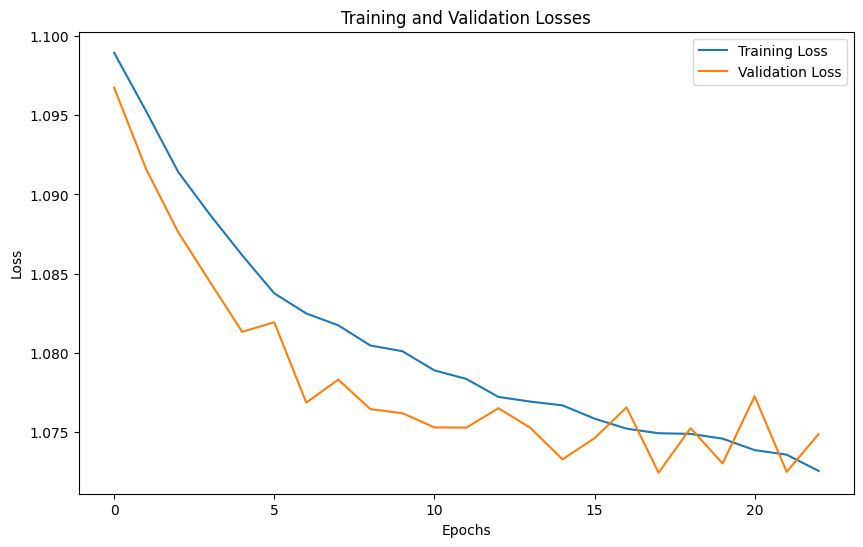

Weighted Precision: 0.3990253729631394
Weighted Recall: 0.3902905198776758
Weighted F1 Score: 0.3720894877247543


In [64]:

from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
class TrainData(Dataset):
    def __init__(self, x, y, input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
    
class ValData(Dataset):
    def __init__(self,x,y,input_dim):
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]
        self.input_dim = input_dim
    
    def __getitem__(self, index):
        return self.x[index, :self.input_dim], self.y[index]
    
    def __len__(self):
        return self.len
# Define the model
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections):
        super(SentimentClassifier, self).__init__()
        self.use_skip_connections = use_skip_connections
        self.rnn = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, bidirectional=True, dropout=dropout_rate)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 for bidirectional

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)
        
        rnn_out, _ = self.rnn(x)
        if self.use_skip_connections and x.size(2) == rnn_out.size(2):
            rnn_out = rnn_out + x  # Skip connection
        final_output = rnn_out[:, -1, :]
        return self.fc(final_output)

    
num_cores = multiprocessing.cpu_count()
criterion = nn.CrossEntropyLoss()
output_dim=3

input_dim = 190
hidden_dim = 20
num_layers = 3
window_size = 7
learning_rate = 0.0006802710564956603
dropout_rate = 0.33171542389215286
b_size = 55
use_skip_connections = False
gradient_clip_val = 0.5743447268798871
model = SentimentClassifier( input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), 
                          vector_size=input_dim, 
                          window=window_size, 
                          min_count=1, 
                          workers=num_cores)

data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
x_train = data['mean_embedding']
x_val = valid['mean_embedding']
y_val = valid['Sentiment']
y_train = data['Sentiment']

x_train = np.vstack(x_train).astype(np.float32)
x_val = np.vstack(x_val).astype(np.float32)

y_val = y_val.values
y_train = y_train.values


train_dataset = TrainData(x_train, y_train,input_dim)
val_dataset = ValData(x_val,y_val,input_dim)

train_loader = DataLoader(dataset=train_dataset, batch_size=b_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=b_size, shuffle=True)

patience = 5  # How many epochs to wait after last time validation loss improved.
best_loss = float('inf')
epochs_no_improve = 0
early_stop = False
train_losses = []
val_losses = []

num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for batch in train_loader:
        x_batch, y_batch = batch
        x_batch = x_batch.float()  # Ensure the input is float
        y_batch = y_batch.long()   # Ensure the target is long/int
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        outputs = model.forward(x_batch)
        loss = criterion(outputs, y_batch)
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_val)
        optimizer.step()
    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    model.eval()
    total_val_loss = 0
    
    with torch.no_grad():
        for batch in val_loader:
            x_val, y_val = batch
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            outputs = model.forward(x_val)
            loss = criterion(outputs, y_val)
            total_val_loss += loss.item()
    
    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    
    # Early stopping logic
    if avg_val_loss < best_loss:
        best_loss = avg_val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    # Check if early stopping is triggered
    if epochs_no_improve == patience:
        print(f'Early stopping triggered after epoch {epoch+1}')
        early_stop = True
        break  # Break out of the training loop
    
all_predictions = []
all_true_labels = []
model.eval()
with torch.no_grad():
    for batch in val_loader:  # DataLoader for validation data
        x_val, y_val = batch
        x_val = x_val.to(device)
        y_val = y_val.to(device)
        outputs = model.forward(x_val)
        _, predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_true_labels.extend(y_val.cpu().numpy())
                
weighted_precision = precision_score(all_true_labels, all_predictions, average='weighted')
weighted_recall = recall_score(all_true_labels, all_predictions, average='weighted')
weighted_f1 = f1_score(all_true_labels, all_predictions, average='weighted')

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("Weighted Precision:", weighted_precision)
print("Weighted Recall:", weighted_recall)
print("Weighted F1 Score:", weighted_f1)

ROC curves

Early stopping triggered after epoch 34


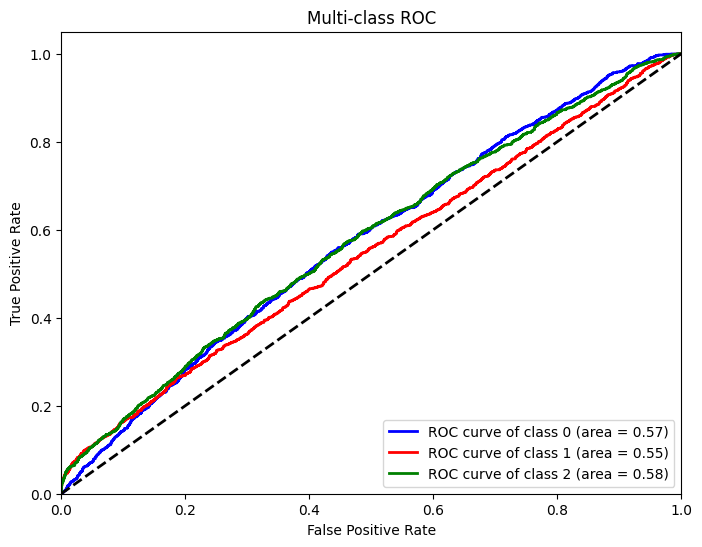

Weighted Precision: 0.40978541785012534
Weighted Recall: 0.3958333333333333
Weighted F1 Score: 0.376884898119237


In [65]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
num_cores = multiprocessing.cpu_count()
criterion = nn.CrossEntropyLoss()
output_dim=3

input_dim = 190
hidden_dim = 20
num_layers = 3
window_size = 7
learning_rate = 0.0006802710564956603
dropout_rate = 0.33171542389215286
b_size = 55
use_skip_connections = False
gradient_clip_val = 0.5743447268798871
model = SentimentClassifier( input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), 
                          vector_size=input_dim, 
                          window=window_size, 
                          min_count=1, 
                          workers=num_cores)

data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
x_train = data['mean_embedding']
x_val = valid['mean_embedding']
y_val = valid['Sentiment']
y_train = data['Sentiment']

x_train = np.vstack(x_train).astype(np.float32)
x_val = np.vstack(x_val).astype(np.float32)

y_val = y_val.values
y_train = y_train.values


train_dataset = TrainData(x_train, y_train,input_dim)
val_dataset = ValData(x_val,y_val,input_dim)

train_loader = DataLoader(dataset=train_dataset, batch_size=b_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=b_size, shuffle=True)

patience = 5  # How many epochs to wait after last time validation loss improved.
best_loss = float('inf')
epochs_no_improve = 0
early_stop = False
train_losses = []
val_losses = []

num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for batch in train_loader:
        x_batch, y_batch = batch
        x_batch = x_batch.float()  # Ensure the input is float
        y_batch = y_batch.long()   # Ensure the target is long/int
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        outputs = model.forward(x_batch)
        loss = criterion(outputs, y_batch)
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_val)
        optimizer.step()
    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    model.eval()
    total_val_loss = 0
    
    with torch.no_grad():
        for batch in val_loader:
            x_val, y_val = batch
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            outputs = model.forward(x_val)
            loss = criterion(outputs, y_val)
            total_val_loss += loss.item()
    
    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    
    # Early stopping logic
    if avg_val_loss < best_loss:
        best_loss = avg_val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    # Check if early stopping is triggered
    if epochs_no_improve == patience:
        print(f'Early stopping triggered after epoch {epoch+1}')
        early_stop = True
        break  # Break out of the training loop
    
all_predictions = []
y_val_cpu = y_val.cpu()  # move the tensor to CPU
y_bin = label_binarize(y_val_cpu, classes=[0, 1, 2])

all_true_labels = []
all_true_labels_cpu = []  # List to store CPU-based true labels
n_classes = 3
model.eval()
all_probs = []

with torch.no_grad():
    for batch in val_loader:  # DataLoader for validation data
        x_val, y_val = batch
        x_val = x_val.to(device)
        y_val = y_val.to(device)
        outputs = model.forward(x_val)
        _, predicted = torch.max(outputs.data, 1)
        all_probs.extend(outputs.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())
        all_true_labels.extend(y_val.cpu().numpy())
        all_true_labels_cpu.extend(y_val.cpu().numpy())  # Store CPU-based labels
                
weighted_precision = precision_score(all_true_labels, all_predictions, average='weighted')
weighted_recall = recall_score(all_true_labels, all_predictions, average='weighted')
weighted_f1 = f1_score(all_true_labels, all_predictions, average='weighted')


y_bin = label_binarize(all_true_labels_cpu, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], np.array(all_probs)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

print("Weighted Precision:", weighted_precision)
print("Weighted Recall:", weighted_recall)
print("Weighted F1 Score:", weighted_f1)

Confusion matrix

Early stopping triggered after epoch 24


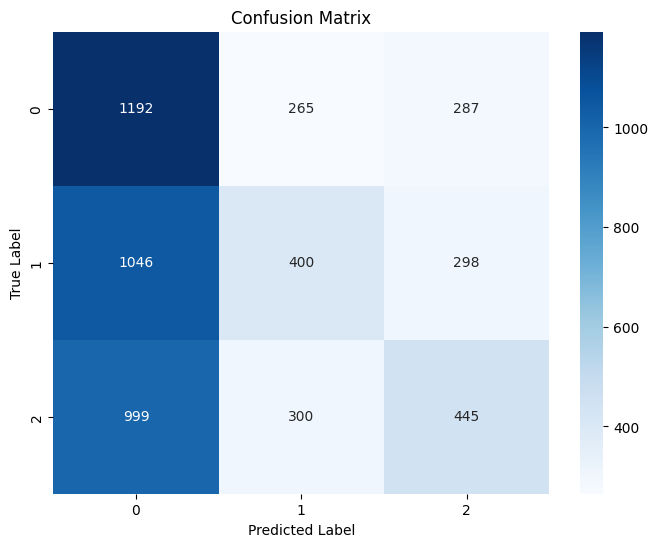

Weighted Precision: 0.40492960217989415
Weighted Recall: 0.3893348623853211
Weighted F1 Score: 0.3649223372975192


In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
num_cores = multiprocessing.cpu_count()
criterion = nn.CrossEntropyLoss()
output_dim=3

input_dim = 190
hidden_dim = 20
num_layers = 3
window_size = 7
learning_rate = 0.0006802710564956603
dropout_rate = 0.33171542389215286
b_size = 55
use_skip_connections = False
gradient_clip_val = 0.5743447268798871
model = SentimentClassifier( input_dim, hidden_dim, output_dim, num_layers, dropout_rate, use_skip_connections)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
word2vec_model = Word2Vec(sentences=data['tokenized_text'].tolist(), 
                          vector_size=input_dim, 
                          window=window_size, 
                          min_count=1, 
                          workers=num_cores)

data['mean_embedding'] = data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
valid['mean_embedding'] = valid['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
x_train = data['mean_embedding']
x_val = valid['mean_embedding']
y_val = valid['Sentiment']
y_train = data['Sentiment']

x_train = np.vstack(x_train).astype(np.float32)
x_val = np.vstack(x_val).astype(np.float32)

y_val = y_val.values
y_train = y_train.values


train_dataset = TrainData(x_train, y_train,input_dim)
val_dataset = ValData(x_val,y_val,input_dim)

train_loader = DataLoader(dataset=train_dataset, batch_size=b_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=b_size, shuffle=True)

patience = 5  # How many epochs to wait after last time validation loss improved.
best_loss = float('inf')
epochs_no_improve = 0
early_stop = False
train_losses = []
val_losses = []

num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for batch in train_loader:
        x_batch, y_batch = batch
        x_batch = x_batch.float()  # Ensure the input is float
        y_batch = y_batch.long()   # Ensure the target is long/int
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        outputs = model.forward(x_batch)
        loss = criterion(outputs, y_batch)
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_val)
        optimizer.step()
    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    model.eval()
    total_val_loss = 0
    
    with torch.no_grad():
        for batch in val_loader:
            x_val, y_val = batch
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            outputs = model.forward(x_val)
            loss = criterion(outputs, y_val)
            total_val_loss += loss.item()
    
    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    
    # Early stopping logic
    if avg_val_loss < best_loss:
        best_loss = avg_val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    # Check if early stopping is triggered
    if epochs_no_improve == patience:
        print(f'Early stopping triggered after epoch {epoch+1}')
        early_stop = True
        break  # Break out of the training loop
    
all_predictions = []
all_true_labels = []
n_classes = 3
model.eval()

with torch.no_grad():
    for batch in val_loader:  # DataLoader for validation data
        x_val, y_val = batch
        x_val = x_val.to(device)
        y_val = y_val.to(device)
        outputs = model.forward(x_val)
        _, predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_true_labels.extend(y_val.cpu().numpy())
                
weighted_precision = precision_score(all_true_labels, all_predictions, average='weighted')
weighted_recall = recall_score(all_true_labels, all_predictions, average='weighted')
weighted_f1 = f1_score(all_true_labels, all_predictions, average='weighted')

cm = confusion_matrix(all_true_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("Weighted Precision:", weighted_precision)
print("Weighted Recall:", weighted_recall)
print("Weighted F1 Score:", weighted_f1)

In [67]:
test_path = "/kaggle/input/ys19-2023-assignment-3/test_set.csv"
test = pd.read_csv(test_path)
test['Text'] = test['Text'].apply(lambda x: x.lower())
greek_stopwords = [
    'και', 'το', 'η', 'της', 'του', 'τα', 'σε', 'με', 'για', 'ειναι',
    'στο', 'απο', 'που', 'οι', 'την', 'ενα', 'μετα', 'εχει', 'δεν',
    'ειναι', 'μια', 'αυτο', 'εναν', 'αλλα', 'ο', 'μη', 'οτι', 'πως',
    'απο', 'στην', 'στον', 'τι', 'αυτη', 'των', 'αυτα', 'οταν', 'πολυ',
    'μας', 'ειναι', 'πριν', 'οτι', 'μονο', 'αυτος', 'τοτε', 'μεταξυ',
    'πολλα', 'οποτε', 'παρα', 'εαν', 'γυρω', 'αυτην', 'εκεινος', 'περισσοτερο',
    'προς', 'πολυ', 'τελικα', 'ολοι'
]
def remove_stopwords(text):
    words = text.split()  # Split the text into words
    words = [word for word in words if word.lower() not in greek_stopwords]
    return ' '.join(words)
test['Text'] = test['Text'].apply(remove_stopwords)
url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
def remove_urls(text):
    return re.sub(url_pattern, '', text)
test['Text'] = test['Text'].apply(remove_urls)

test['Text'] = test['Text'].apply(lambda x: re.sub('ό', 'ο', x))  
test['Text'] = test['Text'].apply(lambda x: re.sub('έ', 'ε', x))  
test['Text'] = test['Text'].apply(lambda x: re.sub('ί', 'ι', x))  
test['Text'] = test['Text'].apply(lambda x: re.sub('ή', 'η', x))  
test['Text'] = test['Text'].apply(lambda x: re.sub('ύ', 'υ', x))  
test['Text'] = test['Text'].apply(lambda x: re.sub('ώ', 'ω', x))  
test['Text'] = test['Text'].apply(lambda x: re.sub('ά', 'α', x))  
test['Text'] = test['Text'].apply(lambda x: re.sub('ς', 'σ', x))

from greek_stemmer import stemmer

# Define a function to perform stemming on the tweets
def stem_greek_text(text):
    words = text.split()
    stemmed_words = [stemmer.stem_word(word,"NNN") for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text


# Apply the stem_greek_text function to the 'tweets' column
test['Text'] = test['Text'].apply(stem_greek_text)
test['Text'] = test['Text'].apply(lambda x: x.lower())
test['Text'] = test['Text'].str.replace('ς', 'σ')
test['Text'] = test['Text'].apply(lambda x: re.sub(r'[^A-Za-zΑ-Ωα-ω0-9 ]', lambda y: ' ' + y.group(0) + ' ', x))
test['Text'] = test['Text'].apply(lambda x: re.sub(r'\s+', ' ', x))
print(test.head(10))

   New_ID                                               Text   Party
0       1  κυριακ μητσοτακ ξερ εινα μουσει βεργιν μεσω χρ...      ND
1       2  συνεντευξ υποψηφι βουλευτ τ νε δημοκρατι βορει...      ND
2       3  αυτ τ εκλογ μαθητ φοιτητ ψηφιζουμ τ ιδι τροπ α...     KKE
3       4  γεννηματα : κιναλ θ γιν δεκανικ κανενοσ . ενδι...   PASOK
4       5  κυριακ εκλογων , οκτωβρ 1993 , ξημερωμ δευτερα...      ND
5       6   @ rounick28 @ yanisvaroufakis γιανν εινα σαν ...    DIEM
6       7      τσιπρ τελειωνε ! θελ να πα να μαγειρεψ # σκαι  SYRIZA
7       8  αποδημ κατα τσιπρ δικαιωμ ψηφου : « ητ δικαι κ...  SYRIZA
8       9  μητσοτακ realfm ελληνικο : ακατανοητ εκδοσ κοι...      ND
9      10  βουλωσ κοσιωνη . αφησ τ να τελειωσ προταση . α...  SYRIZA


In [68]:
all_sentences = data['tokenized_text'].tolist() + valid['tokenized_text'].tolist()
combined_data = pd.concat([data, valid]).reset_index(drop=True)
word2vec_model = Word2Vec(sentences=all_sentences, 
                          vector_size=input_dim, 
                          window=window_size, 
                          min_count=1, 
                          workers=num_cores)
combined_data['mean_embedding'] = combined_data['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))


In [69]:
test['tokenized_text'] = test['Text'].apply(word_tokenize)
test['mean_embedding'] = test['tokenized_text'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))
test.head()

,New_ID,Text,Party,tokenized_text,mean_embedding
0,1,κυριακ μητσοτακ ξερ εινα μουσει βεργιν μεσω χρ...,ND,"[κυριακ, μητσοτακ, ξερ, εινα, μουσει, βεργιν, ...","[-0.27013254, 0.41499472, -0.23423973, 0.39985..."
1,2,συνεντευξ υποψηφι βουλευτ τ νε δημοκρατι βορει...,ND,"[συνεντευξ, υποψηφι, βουλευτ, τ, νε, δημοκρατι...","[-0.24033871, 0.9568074, 0.27218232, 0.0434546..."
2,3,αυτ τ εκλογ μαθητ φοιτητ ψηφιζουμ τ ιδι τροπ α...,KKE,"[αυτ, τ, εκλογ, μαθητ, φοιτητ, ψηφιζουμ, τ, ιδ...","[0.019692358, 0.23080038, 0.10744484, 0.321122..."
3,4,γεννηματα : κιναλ θ γιν δεκανικ κανενοσ . ενδι...,PASOK,"[γεννηματα, :, κιναλ, θ, γιν, δεκανικ, κανενοσ...","[0.28696406, 0.604237, -0.25424406, 0.42045167..."
4,5,"κυριακ εκλογων , οκτωβρ 1993 , ξημερωμ δευτερα...",ND,"[κυριακ, εκλογων, ,, οκτωβρ, 1993, ,, ξημερωμ,...","[-0.14741431, 0.3241489, 0.0050879153, 0.29065..."


In [70]:
x_train = combined_data['mean_embedding']
y_train = combined_data['Sentiment']
x_train = np.vstack(x_train).astype(np.float32)
y_train = y_train.values
train_dataset = TrainData(x_train, y_train,input_dim)
train_loader = DataLoader(dataset=train_dataset, batch_size=b_size, shuffle=True)
x_test = test['mean_embedding']
x_test = np.vstack(x_test).astype(np.float32)

num_epochs = 300

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for batch in train_loader:
        x_batch, y_batch = batch
        x_batch = x_batch.float()  # Ensure the input is float
        y_batch = y_batch.long()   # Ensure the target is long/int
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        outputs = model.forward(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_val)
        optimizer.step()
    
model.eval()  # Set the model to evaluation mode
x_test_tensor = torch.tensor(x_test).float().to(device)  # Convert to tensor and send to device

with torch.no_grad():  # No need to track gradients
    test_outputs = model(x_test_tensor)
    _, test_predictions = torch.max(test_outputs, 1)

test_predictions = test_predictions.cpu().numpy()

In [71]:
test_predictions

array([0, 2, 2, ..., 0, 0, 0])

In [72]:
label_mapping = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}
string_labels = [label_mapping[label] for label in test_predictions]
result_df = pd.DataFrame({ 'Id' : test['New_ID'],'Predicted': string_labels})
result_df

,Id,Predicted
0,1,NEGATIVE
1,2,POSITIVE
2,3,POSITIVE
3,4,POSITIVE
4,5,NEGATIVE
...,...,...
10465,10466,NEGATIVE
10466,10467,NEGATIVE
10467,10468,NEGATIVE
10468,10469,NEGATIVE


In [73]:
result_df.to_csv("submission.csv", index=False)